<a href="https://colab.research.google.com/github/uday-routhu/week5/blob/master/Belt_Exam2(Drug_Type).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Belt Exam2 (DrugType):

* Author: Udayakumar Routhu

###Tasks


- Prepare/clean the data for exploratory analysis purposes (note that you will have to deal with the many categorical variables).
- Check for missing values. You should produce an output that shows the number of missing values for each feature.
- For this task, handle missing values by using an appropriate imputation strategy (instead of dropping rows).
- Write a justification of your strategy for imputing missing values.
- Make sure you avoid any data leakage when you impute values.
- Ensure data types match the data types listed in the data dictionary.
- Check for and address any inconsistent values in categorical columns. (do not drop the entire feature)
- Check for and address any impossible values in numeric columns.
Explore the data
- Create at least two different types of exploratory visualizations.
- Write one to two sentences about what each visualization tells you about the data.
- Prepare the data appropriately for modeling
- Implement a preprocessing pipeline to avoid data leakage.
- Scale the data if your model requires it.
- Write a justification for how you encode the variables (ordinal encoding vs one-hot encoding).
- Create and compare at least 2 different model types to predict drug type.
- Put your preprocessing and models into pipelines.
- For each model type, create a default version of each model with default hyperparameters.
- Create additional versions of each model type where you tune hyperparameters for each model.
- Use appropriate metrics to evaluate each model.
- Choose one final model.
- Write a justification of your choice of final model
Include clear, commented, and organized code. Please note that points will be deducted for inclusion of:
 - inappropriate or redundant code
 - inappropriate or unused imports for modeling or evaluation metrics
errors remaining in code
 - Inappropriate or unnecessary files-


In [42]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

import missingno as msno
## Setting the max_columns to 50
pd.set_option('display.max_columns',50)

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Classification Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import set_config
set_config(transform_output='pandas')

# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # '

In [43]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Define EDA Functions

###explore_categorical


In [44]:
# def explore_categorical_check_constant(df, x, fillna = True, placeholder = 'MISSING',
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """BEST VERSION"""
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()


  ## Save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100


  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)


  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)

  ## Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)

  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add. atitle with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = temp_df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]

  perc_most_common = freq / len(temp_df) * 100
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")

  return fig, ax

In [99]:
def plot_categorical_vs_target(df, x, y,figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # # Save null values before imputing
  # null_count = temp_df[x].isna().sum()
  # null_perc = null_count/len(df)* 100

  ## fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])


  ## Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)

  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
    # show fig and print
  plt.show()
  # print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

  return fig, ax

###explore_numeric

In [46]:
# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)

  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")

  return fig, axes

In [47]:
def plot_numeric_vs_target(df, x, y,figsize=(6,4),):
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  if null_count > 0:
    null_perc = null_count/len(df)* 100
    print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

  return fig, ax

###Model Evalution Function

In [48]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                         output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                         label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                        output_dict=True,figsize=figsize,
                                        colorbar=colorbar, cmap=cmap_test,
                                        label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

### Load in the dataset

In [49]:
# Load the data set
fpath = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/Belt2_A_drugtype_v2_final.csv"
df = pd.read_csv(fpath)

In [50]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    float64
 1   Gender       296 non-null    object 
 2   BP           221 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    object 
 5   Drug         296 non-null    object 
dtypes: float64(1), object(5)
memory usage: 14.0+ KB


,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ


### Source of data
  The data can be downloaded from [this link](https://drive.google.com/file/d/15biox33F9uTNuGvYs45_kc1UOBavckMY/view)

#Prepare/Cleaning Data

####Column for duplicate rows and address them, if needed.

In [51]:
#Explore Data
df.duplicated().sum()

15

* There are 15 duplicated records in dataset

In [52]:
# drop duplicated record
df = df.drop_duplicates()

In [53]:
#again check duplicates dropped or not
df.duplicated().sum()

0

* now, there are no duplicated rows

###Check for missing values. You should produce an output that shows the number of missing values for each feature.

In [54]:
null_counts= df.isna().sum()

. Never use fillna() to impute values prior to Train_Test_Split, as it would cause data leakage.

In [55]:
# Getting nulls as percent of total vallues
null_percent = null_counts/len(df) * 100
null_percent

Age            19.217082
Gender          0.000000
BP             26.690391
Cholesterol     0.000000
Na_to_K         0.000000
Drug            0.000000
dtype: float64

In [56]:
## Combining null_counts and null_percent above
null_report = pd.DataFrame({'# Null':null_counts,
                            '% Null':null_percent}).round(2)
null_report

,# Null,% Null
Age,54,19.22
Gender,0,0.00
BP,75,26.69
Cholesterol,0,0.00
Na_to_K,0,0.00
Drug,0,0.00


- Of these columns, 2 seem to have primarily null values ("Age" and "BP").

In [57]:
## filtering for only columns with null values
null_report[ null_report['# Null']>0]

,# Null,% Null
Age,54,19.22
BP,75,26.69


#### Null Value Observations:
- Age and BP have a 1/3 percentage of null values (19.93% and 25.34%, respectively).
- The presence of missing values in the "Age" and "BP" columns could impact your analysis.
- We can Imputer place holder for 'MISSING' for catogorical and mean/median fro numerical columns.


###Ensure data types match the data types listed in the data dictionary.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          227 non-null    float64
 1   Gender       281 non-null    object 
 2   BP           206 non-null    object 
 3   Cholesterol  281 non-null    object 
 4   Na_to_K      281 non-null    object 
 5   Drug         281 non-null    object 
dtypes: float64(1), object(5)
memory usage: 15.4+ KB


**Which columns should be converted to a numeric dtype?**
   - **Your Answer:**
      - Na_to_K

In [59]:
# Clean the "Na_to_K" column by removing non-numeric characters
df['Na_to_K'] = df['Na_to_K'].str.replace(r'[^\d.]', '', regex=True)

# Convert 'age' column to integers, NaN will remain as float type
df['Na_to_K'] = df['Na_to_K'].astype('float')

# Confirm the datatype
df['Na_to_K'].dtype

dtype('float64')

####Check for and address any inconsistent values in categorical columns.

In [60]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")
    print(df[col])

- Gender:
M         140
F         131
male        4
female      2
Female      1
Male        1
femal       1
Femal       1
Name: Gender, dtype: int64



0      M
1      F
2      M
3      M
4      F
      ..
290    M
292    F
293    M
294    F
295    F
Name: Gender, Length: 281, dtype: object
- BP:
High      128
NaN        75
Normal     46
Low        32
Name: BP, dtype: int64



0        High
1      Normal
2      Normal
3      Normal
4        High
        ...  
290      High
292    Normal
293       Low
294      High
295    Normal
Name: BP, Length: 281, dtype: object
- Cholesterol:
HIGH      145
NORMAL    114
norm        9
high        7
NORM        6
Name: Cholesterol, dtype: int64



0        HIGH
1        HIGH
2        HIGH
3        HIGH
4      NORMAL
        ...  
290      HIGH
292      HIGH
293    NORMAL
294    NORMAL
295      HIGH
Name: Cholesterol, Length: 281, dtype: object
- Drug:
drugZ    147
drugQ    134
Name: Drug, dtype: int64



0      drugQ
1      drugZ
2      drugZ
3      d

In [61]:
# replacing inconsistent categories in Item_Fat_Content column
# then checking to make sure the change took place
Cholesterol_map = {'high':'HIGH',
                   'norm':'NORMAL',
                   'NORM':'NORMAL'}
Gender_map = {'femal':'F',
                   'Femal':'F',
                   'female':'F',
                   'Female':'F',
                   'Male' : 'M',
                   'male':'M'}
df['Gender'] = df['Gender'].replace(Gender_map)
df['Cholesterol'] = df['Cholesterol'].replace(Cholesterol_map)

In [62]:
df['Gender'].value_counts()

M    145
F    136
Name: Gender, dtype: int64

In [63]:
df['Cholesterol'].value_counts()

HIGH      152
NORMAL    129
Name: Cholesterol, dtype: int64

###Check for impossible numeric values and fix them, if needed

In [64]:
stats =  df.describe()
stats.loc[['mean','min','max']]

,Age,Na_to_K
mean,47.475771,14.862769
min,15.000000,6.269000
max,570.000000,38.247000


* There are no impossible numeric values

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          227 non-null    float64
 1   Gender       281 non-null    object 
 2   BP           206 non-null    object 
 3   Cholesterol  281 non-null    object 
 4   Na_to_K      281 non-null    float64
 5   Drug         281 non-null    object 
dtypes: float64(2), object(4)
memory usage: 15.4+ KB


###Explore the data

### Catgorical Columns

###Gender

- 	M (male) or F (female)

In [90]:
# Confirming the dtype to select correct EDA function
feature = "Gender"
df[feature].dtype

dtype('O')

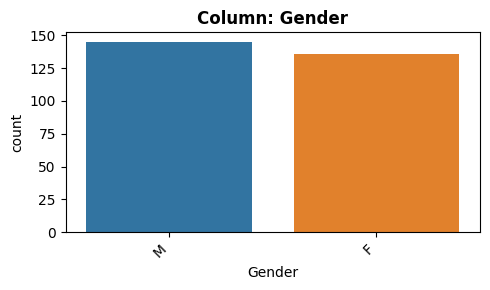

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'M' occurs 145 times (51.6%)


In [91]:
# Testing function
fig, ax = explore_categorical(df, "Gender", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 51.6% of the feature.

4. What is the cardinality? Is it high?
  - There are 2 categories. Not high cardinality ( < 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

###BP

- Blood pressure levels (low, normal, or high)

In [93]:
# Confirming the dtype to select correct EDA function
feature = "BP"
df[feature].dtype

dtype('O')

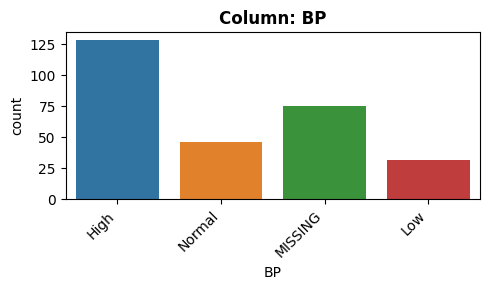

- NaN's Found: 75 (26.69%)
- Unique Values: 4
- Most common value: 'High' occurs 128 times (45.55%)


In [94]:
# Testing function
fig, ax = explore_categorical(df, "BP", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 75 null values(26.69%).
  - impute with 'MISSING'.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 45.55% of the feature.

4. What is the cardinality? Is it high?
  - There are 4 categories. Not high cardinality ( < 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

###Cholesterol

- Cholesterol levels (normal or high)

In [95]:
# Confirming the dtype to select correct EDA function
feature = "Cholesterol"
df[feature].dtype

dtype('O')

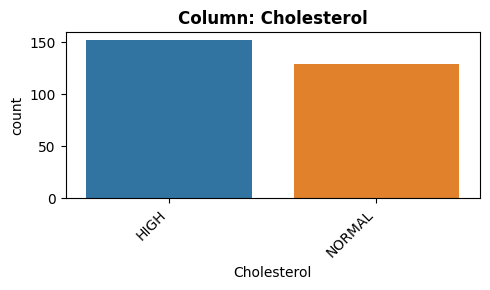

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'HIGH' occurs 152 times (54.09%)


In [96]:
# Testing function
fig, ax = explore_categorical(df, "Cholesterol", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 54.09% of the feature.

4. What is the cardinality? Is it high?
  - There are 2 categories. Not high cardinality ( < 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Drug

- Type of drug (drugQ, drugZ) (target)

In [97]:
# Confirming the dtype to select correct EDA function
feature = "Drug"
df[feature].dtype

dtype('O')

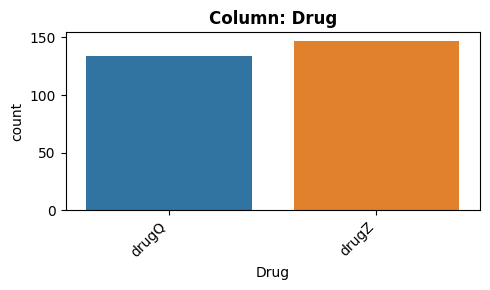

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'drugZ' occurs 147 times (52.31%)


In [67]:
# Testing function
fig, ax = explore_categorical(df, "Drug", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 52.31% of the feature.

4. What is the cardinality? Is it high?
  - There are 2 categories. Not high cardinality ( < 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, since it is our target!.


TypeError: ignored

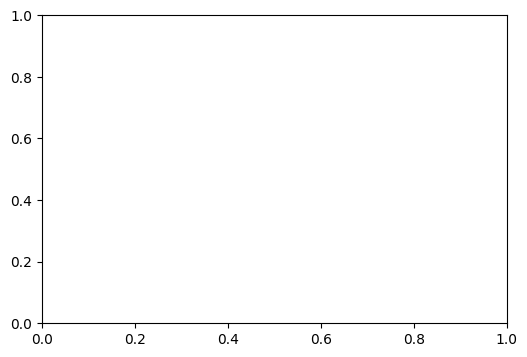

In [98]:
# Testing function
fig, ax = plot_categorical_vs_target(df, 'Cholesterol','Drug')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes , we can predict drugZ usage more than drugQ
  - Does this feature appear to be a predictor of the target?
    - Yes.

### Numeric Columns

###Na_to_K

. Sodium to Potassium ratio in blood

In [69]:
# Confirming the dtype to select correct EDA function
feature = "Na_to_K"
df[feature].dtype

dtype('float64')

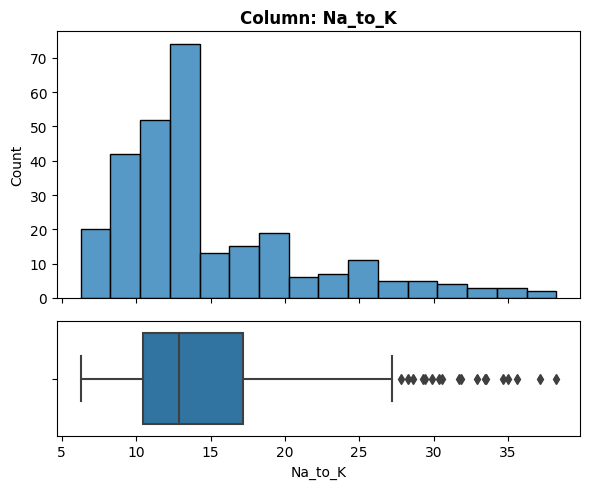

- NaN's Found: 0 (0.0%)
- Unique Values: 183
- Most common value: '12.766' occurs 7 times (2.49%)


In [70]:
# Testing the function
explore_numeric(df, "Na_to_K");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

###Age

- Age of patient

In [88]:
# Confirming the dtype to select correct EDA function
feature = "Age"
df[feature].dtype

dtype('float64')

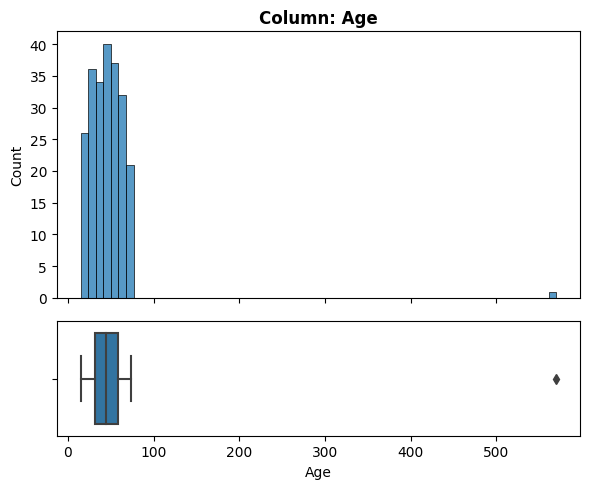

- NaN's Found: 54 (19.22%)
- Unique Values: 59
- Most common value: 'nan' occurs 54 times (19.22%)


In [89]:
# Testing the function
explore_numeric(df, "Age");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 54 null values(19.22%).
  - Impute with mean or median .
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

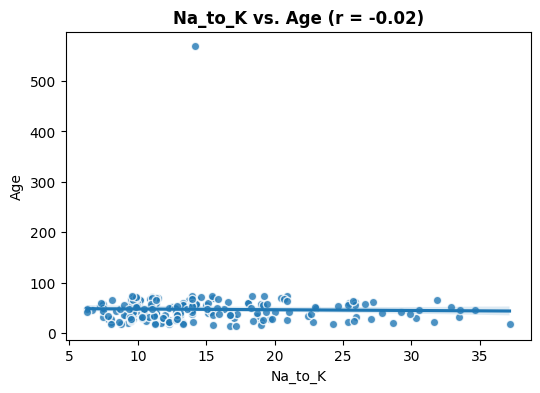

In [71]:
fig, ax = plot_numeric_vs_target(df, 'Na_to_K','Age')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but there are some outleirs that may be affecting the overall trendline.

###Prepare the data appropriately for modeling

###Check Class Balance

In [72]:
df['Drug'].value_counts(normalize = False)

drugZ    147
drugQ    134
Name: Drug, dtype: int64

In [73]:
# Check how many samples of each class are present
df['Drug'].value_counts(normalize=True)

drugZ    0.523132
drugQ    0.476868
Name: Drug, dtype: float64

###Split the Data

In [74]:
# Define X and y
target = 'Drug'
X = df.drop(columns = [target]).copy()
y = df[target]

In [75]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

###Class Balance

In [76]:
# Check how many samples of each class are present for train
y_train.value_counts(normalize=True)

drugQ    0.5
drugZ    0.5
Name: Drug, dtype: float64

In [77]:
# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "Missing")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
# Numerical Preprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple],
                                 verbose_feature_names_out=False)

OneHotEncoder Columns: Index(['Gender', 'BP', 'Cholesterol'], dtype='object')
Numeric Columns: Index(['Age', 'Na_to_K'], dtype='object')


#### Justifications for encode the variables:
One-Hot Encoding (OHE):
- In the code, the OneHotEncoder is applied to categorical columns. It converts each categorical value into a binary vector, where each element represents the presence or absence of a category.
- The handle_unknown='ignore' parameter ensures that the encoder handles unseen categories during testing without causing errors.
- The approach taken in the code snippet primarily focuses on using one-hot encoding (OHE).

Ordinal Encoding:
- Ordinal encoding is suitable for categorical variables with an inherent order or hierarchy between categories.
- In the provided above code, there is no explicit usage of ordinal encoding. It's not applied in the pipeline.

###Model

In [78]:
# Create an instance of the model
dtc = DecisionTreeClassifier(random_state=42)
# Create a model pipeline
clf_pipe = make_pipeline(preprocessor, dtc)
# Fit the model
clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Na_to_K'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'BP', 'Cholesterol'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [79]:
clf_pipe.predict(X_train)

array(['drugQ', 'drugQ', 'drugZ', 'drugQ', 'drugZ', 'drugQ', 'drugZ',
       'drugQ', 'drugQ', 'drugQ', 'drugZ', 'drugQ', 'drugZ', 'drugQ',
       'drugZ', 'drugZ', 'drugZ', 'drugQ', 'drugQ', 'drugZ', 'drugZ',
       'drugQ', 'drugQ', 'drugZ', 'drugQ', 'drugZ', 'drugQ', 'drugQ',
       'drugQ', 'drugQ', 'drugQ', 'drugQ', 'drugZ', 'drugZ', 'drugQ',
       'drugZ', 'drugQ', 'drugZ', 'drugZ', 'drugZ', 'drugQ', 'drugQ',
       'drugQ', 'drugZ', 'drugZ', 'drugZ', 'drugQ', 'drugZ', 'drugQ',
       'drugZ', 'drugZ', 'drugQ', 'drugZ', 'drugZ', 'drugQ', 'drugZ',
       'drugQ', 'drugQ', 'drugQ', 'drugQ', 'drugQ', 'drugZ', 'drugZ',
       'drugQ', 'drugQ', 'drugZ', 'drugZ', 'drugZ', 'drugZ', 'drugQ',
       'drugZ', 'drugZ', 'drugZ', 'drugZ', 'drugZ', 'drugZ', 'drugQ',
       'drugZ', 'drugZ', 'drugQ', 'drugZ', 'drugQ', 'drugZ', 'drugQ',
       'drugZ', 'drugZ', 'drugZ', 'drugZ', 'drugZ', 'drugQ', 'drugQ',
       'drugZ', 'drugZ', 'drugZ', 'drugQ', 'drugQ', 'drugZ', 'drugQ',
       'drugQ', 'dru

In [80]:
y_train

68     drugQ
215    drugQ
110    drugZ
111    drugQ
206    drugZ
       ...  
194    drugZ
72     drugZ
107    drugQ
284    drugZ
103    drugZ
Name: Drug, Length: 210, dtype: object

Evaluation Functions

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       drugQ       1.00      1.00      1.00       105
       drugZ       1.00      1.00      1.00       105

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



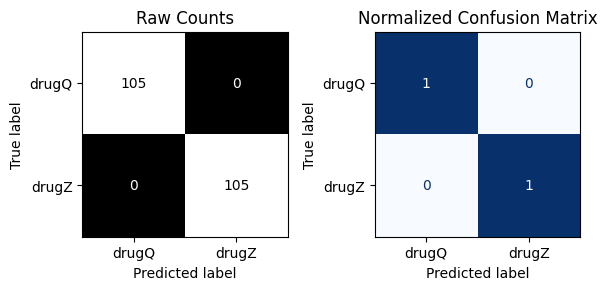


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       drugQ       0.96      0.93      0.95        29
       drugZ       0.95      0.98      0.96        42

    accuracy                           0.96        71
   macro avg       0.96      0.95      0.96        71
weighted avg       0.96      0.96      0.96        71



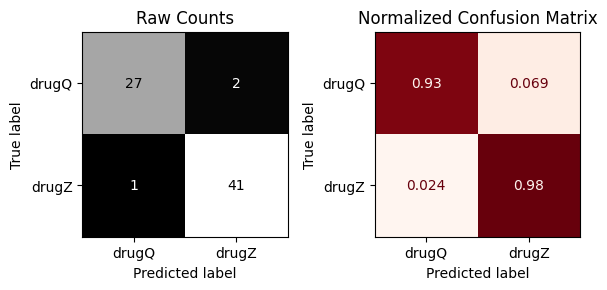

In [81]:
## Evaluate the model
evaluate_classification(clf_pipe, X_train, y_train, X_test, y_test)

- The model exhibits high performance on both the training and test data, achieving accuracy levels of 1.00 on training data and 0.96 on test data.
- This indicates that the model is able to predict the classes of the target variable with a high degree of correctness.

### Using GridSearchCV

In [82]:
param_grid = {
    'decisiontreeclassifier__max_depth': [None, 5, 10, 15],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}
# Create GridSearchCV instance
grid_search = GridSearchCV(clf_pipe, param_grid, cv=5, scoring='recall_macro')
grid_search.fit(X_train, y_train)
grid_search.best_params_
grid_search.best_score_

0.9476190476190476

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       drugQ       0.93      1.00      0.96       105
       drugZ       1.00      0.92      0.96       105

    accuracy                           0.96       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210



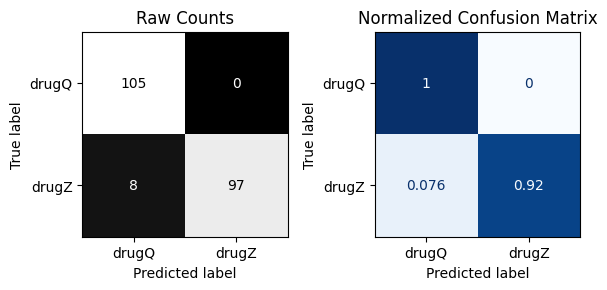


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       drugQ       0.91      1.00      0.95        29
       drugZ       1.00      0.93      0.96        42

    accuracy                           0.96        71
   macro avg       0.95      0.96      0.96        71
weighted avg       0.96      0.96      0.96        71



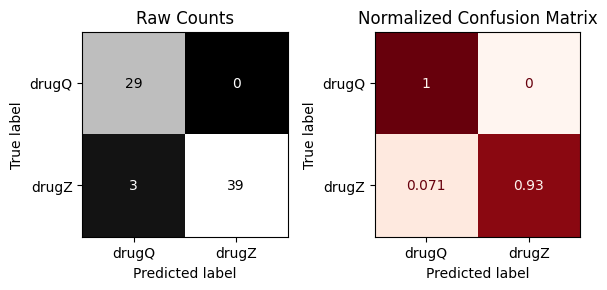

In [83]:
# Evalaute the best model
best_clf = grid_search.best_estimator_
evaluate_classification(best_clf, X_train, y_train, X_test, y_test)

- The tuning of the DecisionTreeClassifier using GridSearchCV has slightly affected the model's performance metrics, particularly in terms of precision and recall for each class.

- The precision and recall for both classes "drugQ" and "drugZ" are slightly different from the original model, indicating that the model's decision boundaries have been adjusted.

###Regression Model

In [84]:
## Make an instance of the model with default parameters
logreg = LogisticRegression(max_iter=500, random_state=42)
# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(preprocessor, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Na_to_K'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'BP', 'Cholesterol'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       drugQ       0.88      0.96      0.92       105
       drugZ       0.96      0.87      0.91       105

    accuracy                           0.91       210
   macro avg       0.92      0.91      0.91       210
weighted avg       0.92      0.91      0.91       210



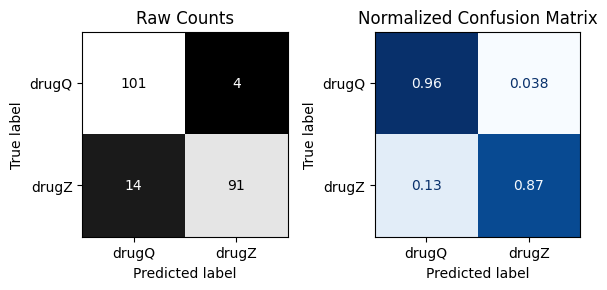


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       drugQ       0.88      0.97      0.92        29
       drugZ       0.97      0.90      0.94        42

    accuracy                           0.93        71
   macro avg       0.92      0.94      0.93        71
weighted avg       0.93      0.93      0.93        71



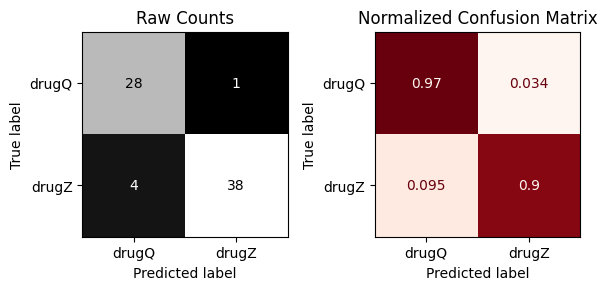

In [85]:
## Evaluate the model
evaluate_classification(logreg_pipe, X_train, y_train, X_test, y_test)

- The Logistic Regression model's performance metrics are also quite balanced for both classes "drugQ" and "drugZ."
- The model shows relatively high precision and recall values for both training and test data, indicating that the model is able to differentiate between the two classes effectively.

###Using GridSearch CV

In [86]:

# Making a logreg pipe that uses L2 regularization
logreg_pipe = make_pipeline(preprocessor, LogisticRegression(solver='liblinear',
                                                       max_iter=500,
                                                       penalty='l2',
                                                       random_state=42))
# Define the params and instantiate gridsearch
l2_params = {'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                            'newton-cholesky', 'sag', 'saga'],
                  'logisticregression__penalty' : ['l2'],
                  'logisticregression__C': [0.0001, 0.001, 0.01, 0.1,
                                            1, 10, 100, 1000,10000] }
gs = GridSearchCV(logreg_pipe, l2_params,verbose=True, n_jobs=-1,
                  return_train_score=True,scoring='recall_macro')
# Fit gridsearch and display best params
gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'logisticregression__C': 1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs'}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       drugQ       0.88      0.96      0.92       105
       drugZ       0.96      0.87      0.91       105

    accuracy                           0.91       210
   macro avg       0.92      0.91      0.91       210
weighted avg       0.92      0.91      0.91       210



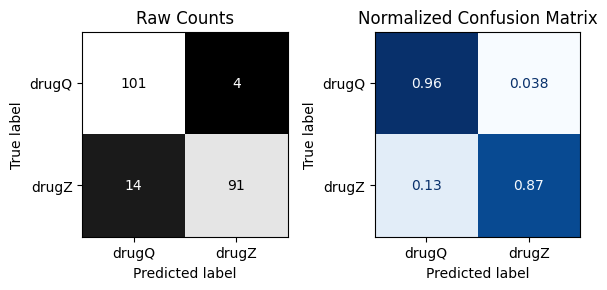


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       drugQ       0.88      0.97      0.92        29
       drugZ       0.97      0.90      0.94        42

    accuracy                           0.93        71
   macro avg       0.92      0.94      0.93        71
weighted avg       0.93      0.93      0.93        71



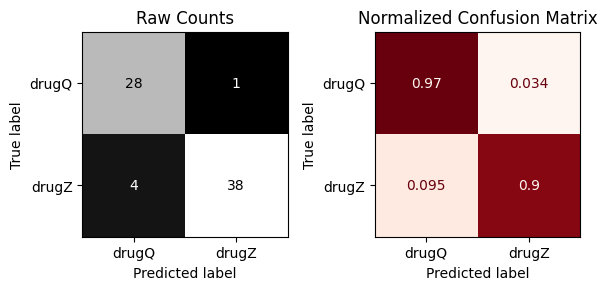

In [87]:
# Evalaute the best model
best_logreg = gs.best_estimator_
evaluate_classification(best_logreg, X_train, y_train, X_test, y_test)

- These metrics indicate that the Logistic Regression model with Grid SearchCV is performing consistently well on both training and test data, with balanced precision and recall values and a high overall accuracy.

####Choose one final model

####Write a justification of your choice of final model

- Considering the precision, recall, and F1-score, it seems that the Decision Tree Classifier tuned with GridSearchCV is performing well on both the training and test data.
- It has demonstrated consistent performance and maintained a good balance between precision and recall for both classes.
- The model has a high accuracy score on the test data, indicating that it's generalizing well to new, unseen data.
- Additionally, Decision Trees are relatively easy to understand and interpret.
- However, please note that the choice of the final model also depends on other factors such as the nature of the problem, the amount of data available, and potential business constraints.